<a href="https://colab.research.google.com/github/sreyaa12/NLP/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data science/Machine Learning/NLP/Project/email_classification.csv')
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


In [ ]:
df.shape

(179, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [ ]:
df.isnull().sum()

,0
email,0
label,0


In [ ]:
df.duplicated().sum()

29

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['email'].value_counts()

,count
email,
Upgrade to our premium plan for exclusive access to premium content and features.,1
Your trial period has ended. Upgrade to a premium plan for unlimited access.,1
Congratulations! You've been selected for a free trial of our premium software. Click here to download now!,1
Your order is confirmed. You'll receive a confirmation email shortly with the details.,1
We're committed to providing excellent service. Your feedback helps us improve.,1
...,...
You've been selected for a special prize. Click here to claim your reward!,1
Upgrade to our premium membership for exclusive benefits and personalized recommendations.,1
We've updated our app with new features. Update now for an enhanced user experience.,1


In [ ]:
text = df['email']

In [ ]:
type(text)

pandas.core.series.Series

In [ ]:
text1=[]

In [ ]:
for txt in text:
    # Lowercase the text
    txt = txt.lower()
    # Remove special characters and digits
    txt = re.sub(r'\W', ' ', txt)
    txt = re.sub(r'\d', ' ', txt)
    # Remove extra spaces
    txt = re.sub(r'\s+', ' ', txt).strip()
    text1.append(txt)  # Append the cleaned text to text1

In [ ]:
text1

['upgrade to our premium plan for exclusive access to premium content and features',
 'happy holidays from our team wishing you joy and prosperity this season',
 'we re hiring check out our career opportunities and join our dynamic team',
 'your amazon account has been locked click here to verify your account information',
 'your opinion matters take our survey and help us enhance your experience',
 'your payment has been received thank you for your prompt transaction',
 'your email account storage is full click here to upgrade your account',
 'dear name thank you for subscribing to our newsletter here s your welcome gift',
 'your account has been credited with loyalty points redeem them for exciting rewards',
 'you ve been chosen for a free iphone click here to claim your prize',
 'don t miss out on our special offer sign up now and get a discount on your first purchase',
 'we re hiring interns for the summer apply now and gain valuable experience',
 'you re pre approved for a loan cl

In [ ]:
text=pd.Series(text1)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
text = text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [ ]:
text

,0
0,upgrade our premium plan for exclusive access ...
1,happy holidays from our team wishing you joy a...
2,hiring check out our career opportunities and ...
3,your amazon account has been locked click here...
4,your opinion matters take our survey and help ...
...,...
145,pleased inform you that your refund has been p...
146,get rich quick invest our revolutionary new sc...
147,your free trial period ending soon upgrade now...
148,your order its way track your shipment for rea...


In [ ]:
# lowecase conversion and normalization(convert in to root form or cut the tail part)
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
text = text.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
text

,0
0,upgrad our premium plan for exclus access prem...
1,happi holiday from our team wish you joy and p...
2,hire check out our career opportun and join ou...
3,your amazon account has been lock click here v...
4,your opinion matter take our survey and help e...
...,...
145,pleas inform you that your refund has been pro...
146,get rich quick invest our revolutionari new sc...
147,your free trial period end soon upgrad now con...
148,your order it way track your shipment for real...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text = text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [ ]:
text

,0
0,upgrad premium plan exclus access premium cont...
1,happi holiday team wish joy prosper season
2,hire check career opportun join dynam team
3,amazon account lock click verifi account inform
4,opinion matter take survey help enhanc experi
...,...
145,pleas inform refund process success
146,get rich quick invest revolutionari new scheme...
147,free trial period end soon upgrad continu enjo...
148,order way track shipment real time updat


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data_vec = vec.fit_transform(text)

In [ ]:
print(train_data_vec)

  (0, 354)	0.286411037739688
  (0, 238)	0.5904837893442582
  (0, 231)	0.3687801827645549
  (0, 105)	0.27851156703138613
  (0, 0)	0.2952418946721291
  (0, 70)	0.39918018341699085
  (0, 114)	0.33048071140381696
  (1, 134)	0.3748141189181049
  (1, 139)	0.3748141189181049
  (1, 326)	0.2910972600373125
  (1, 376)	0.4057115206554625
  (1, 167)	0.4057115206554625
  (1, 249)	0.4057115206554625
  (1, 285)	0.3748141189181049
  (2, 326)	0.3118261615337939
  (2, 138)	0.37802134443515706
  (2, 53)	0.33234063270916353
  (2, 45)	0.401504459285953
  (2, 214)	0.4346020507366346
  (2, 165)	0.33234063270916353
  (2, 92)	0.4346020507366346
  (3, 9)	0.4748571021396701
  (3, 1)	0.49218074384301425
  (3, 178)	0.438693843504709
  (3, 56)	0.19328559214360774
  :	:
  (146, 93)	0.3695698363811278
  (147, 354)	0.2911509134589739
  (147, 121)	0.2911509134589739
  (147, 99)	0.2758565126402209
  (147, 293)	0.3103051979887194
  (147, 343)	0.32205401003290757
  (147, 71)	0.35295710660684126
  (147, 228)	0.374883202563

In [ ]:
train_data_vec.shape

(150, 382)

In [ ]:
type(train_data_vec)

scipy.sparse._csr.csr_matrix

In [ ]:
y = df['label'].values

In [ ]:
y

array(['ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data_vec,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [ ]:
x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test,x_test_pred)
test_accuracy

0.9666666666666667

In [ ]:
text = 'happy holidays from our team wishing you joy and prosperity this season'

In [ ]:
import numpy as np

In [ ]:
model.predict(vec.transform([text]))

array(['ham'], dtype=object)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

model1.fit(x_train,y_train)


MultinomialNB()

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1

array(['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam'], dtype='<U4')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred1)

0.9666666666666667

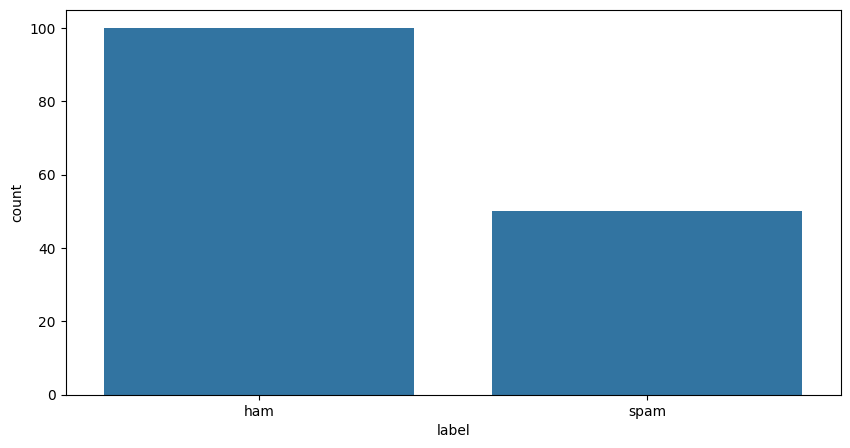

In [ ]:
#bar chart

plt.figure(figsize=(10,5))
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts())
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

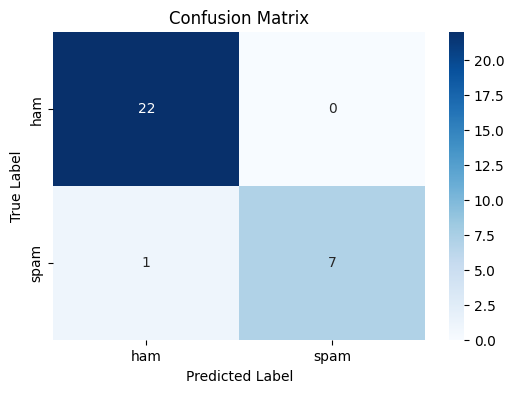

In [ ]:
#Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# New prediction
sample = "your amazon account has been locked click here to verify your account information"

print("The result of sample message :  " ,model.predict(vec.transform([sample])))

The result of sample message :   ['spam']


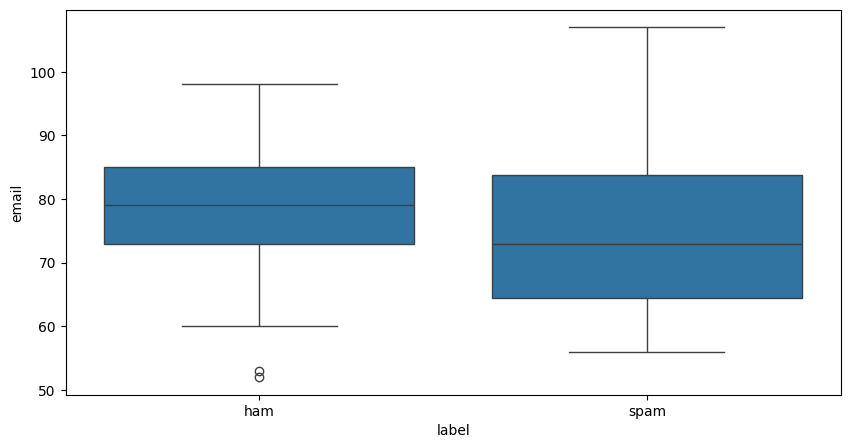

In [ ]:
#Box plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['label'],y=df['email'].str.len())
plt.show()

<ipython-input-99-d5cf92e9b010>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['label'], y=df['email'].str.len(), ci=None)


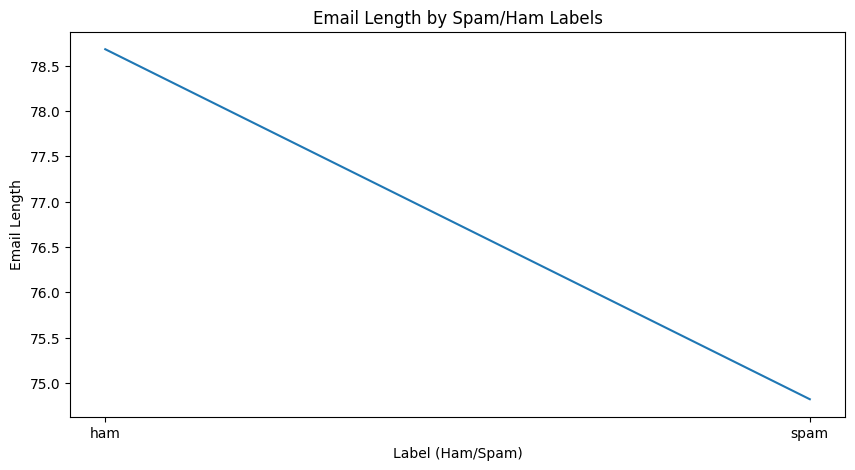

In [ ]:
#lineplot

plt.figure(figsize=(10, 5))
sns.lineplot(x=df['label'], y=df['email'].str.len(), ci=None)
plt.title("Email Length by Spam/Ham Labels")
plt.xlabel("Label (Ham/Spam)")
plt.ylabel("Email Length")
plt.show()


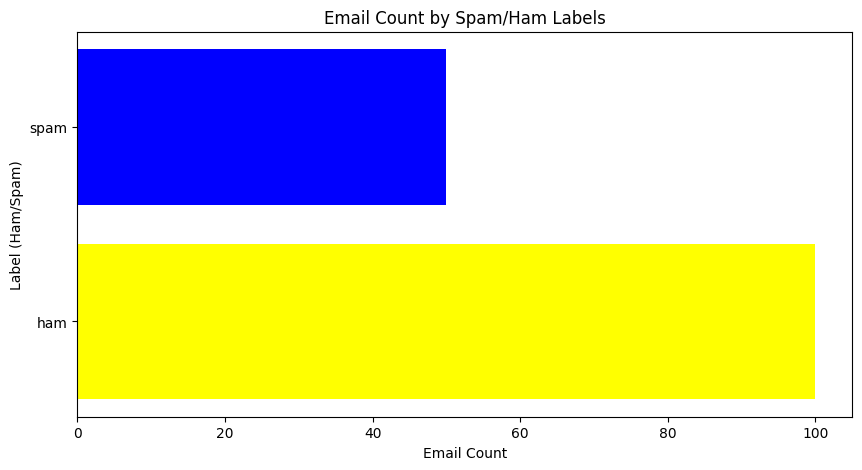

In [ ]:
#Horizontal bar

plt.figure(figsize=(10, 5))
plt.barh(y=df['label'].value_counts().index, width=df['label'].value_counts(), height=0.8, color=['yellow', 'blue'])
plt.title("Email Count by Spam/Ham Labels")
plt.xlabel("Email Count")
plt.ylabel("Label (Ham/Spam)")
plt.show()